## **Collaborative Filtering**
**predicting** what **users** will **like** based on their **similarity to other users.**

In [38]:
import numpy as np
import pandas as pd

rating_df = pd.read_csv('./animelist.csv', 
                        low_memory=False, 
                        usecols=["user_id", "anime_id", "rating","watched_episodes","watching_status"]
                        #, nrows=90000000
                        )
rating_df.head(4)

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1


In [39]:
# User should rate atleast 400 animies
n_ratings = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
len(rating_df)

71418114

In [40]:
# Scaling BTW (0 , 1.0)
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
rating_df['rating'] = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating_df['rating'])
print('Avg', AvgRating)

Avg 0.40477935891013467


In [41]:
# Removing Duplicated Rows
duplicates = rating_df.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]

print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 1 duplicates
> 0 duplicates


In [42]:
g = rating_df.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = rating_df.groupby('anime_id')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)

anime_id,226,1535,1575,2001,2167,4224,5081,5114,6547,6746,9253,9989,10620,11757,15809,16498,19815,20507,22319,30276
user_id,,,,,,,,,,,,,,,,,,,,
20807,1.0,1.0,1.0,1.0,0.8,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0
50485,0.0,0.6,1.0,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,0.9,0.6,1.0,1.0,0.9,1.0,1.0,1.0,0.8
63900,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0,0.8,0.8,0.8
68042,0.8,1.0,0.9,1.0,0.7,0.9,1.0,0.9,0.7,0.8,0.9,0.8,0.4,0.4,0.6,0.9,0.3,0.2,0.5,0.9
85472,0.7,0.0,0.0,1.0,0.9,0.9,0.0,0.0,1.0,0.0,0.8,0.0,0.8,0.9,0.8,0.8,0.7,0.7,0.7,0.9
92529,0.9,0.9,1.0,1.0,0.0,0.8,0.0,0.9,0.9,0.0,1.0,0.0,0.8,0.9,0.8,0.9,0.9,0.8,0.8,1.0
122341,0.2,0.3,0.2,0.7,0.4,0.3,0.3,0.8,0.5,0.6,0.7,0.3,0.2,0.1,0.3,0.1,0.4,0.4,0.2,0.6
131988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140590,0.3,0.6,0.5,0.8,0.6,0.8,0.8,0.9,0.5,0.8,0.9,0.7,0.3,0.4,0.6,0.5,0.7,0.7,0.5,0.7


## **Data Preprocessing**

In [43]:
# Encoding categorical data
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

anime_ids = rating_df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))

Num of users: 91641, Num of animes: 17560
Min rating: 0.0, Max rating: 1.0


In [44]:
we_ids = rating_df["watched_episodes"].unique().tolist()
we2we_encoded = {x: i for i, x in enumerate(we_ids)}
n_we = len(we2we_encoded)
print(n_we)

1319


In [45]:
ws_ids = rating_df["watching_status"].unique().tolist()
ws2ws_encoded = {x: i for i, x in enumerate(ws_ids)}
n_ws = len(ws2ws_encoded)
print(n_ws)

9


In [46]:
rating_df = rating_df.sample(frac=1, random_state=73)

X = rating_df[['user', 'anime','watching_status','watched_episodes']].values
y = rating_df["rating"]
print(rating_df.shape[0])

71418113


## **Extracting weights from model**

In [9]:
import tensorflow as tf

In [14]:
model = tf.keras.models.load_model('./DL.h5')

In [47]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)
ws_weights = extract_weights('status_embedding', model)
we_weights = extract_weights('episode_embedding', model)

### **anime meta data**

In [16]:
df = pd.read_csv( './anime.csv', low_memory=True)
df = df.replace("Unknown", np.nan)

In [17]:
# Fixing Names
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if name is np.nan:
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print('error')
    
    return name

df['anime_id'] = df['MAL_ID']
df["eng_version"] = df['English name']
df['eng_version'] = df.anime_id.apply(lambda x: getAnimeName(x))

df.sort_values(by=['Score'], 
               inplace=True,
               ascending=False, 
               kind='quicksort',
               na_position='last')

df = df[["anime_id", "eng_version", 
         "Score", "Genres", "Episodes", 
         "Type", "Premiered", "Members"]]

In [18]:
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df.anime_id == anime]
    if isinstance(anime, str):
        return df[df.eng_version == anime]

### **synopsis data**

In [19]:
cols = ["MAL_ID", "Name", "Genres", "sypnopsis"]
sypnopsis_df = pd.read_csv('./anime_with_synopsis.csv', usecols=cols)

def getSypnopsis(anime):
    if isinstance(anime, int):
        return sypnopsis_df[sypnopsis_df.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime, str):
        return sypnopsis_df[sypnopsis_df.Name == anime].sypnopsis.values[0]

# Finding Similar Animes (Content Based Recommendation)

In [22]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        index = getAnimeFrame(name).anime_id.values[0]
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights
        
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1            
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('animes closest to {}'.format(name))

        if return_dist:
            return dists, closest
        
        rindex = df

        SimilarityArr = []

        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = getSypnopsis(decoded_id)
            anime_frame = getAnimeFrame(decoded_id)
            
            anime_name = anime_frame.eng_version.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                  "similarity": similarity,"genres": genre,
                                  'sypnopsis': sypnopsis})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)

    except:
        print('{}!, Not Found in Anime list'.format(name))

### **find animes similar to your fav**

In [23]:
find_similar_animes('Cowboy Bebop', n=5, neg=False)

animes closest to Sword Art Online


,name,similarity,genres,sypnopsis
4,The Future Diary,0.787074,"Action, Mystery, Psychological, Shounen, Supernatural, Thriller","onely high school student, Yukiteru Amano, spends his days writing a diary on his cellphone, while conversing with his two seemingly imaginary friends Deus Ex Machina, who is the god of time and space, and Murmur, the god's servant. Revealing himself to be an actual entity, Deus grants Yukiteru a ""Random Diary,"" which shows highly descriptive entries based on the future and forces him into a bloody battle royale with 11 other holders of similarly powerful future diaries. With the last person standing designated as the new god of time and space, Yukiteru must find and kill the other 11 in order to survive. He reluctantly teams up with his obsessive stalker Yuno Gasai (who also possesses such a diary), and she takes it upon herself to ensure his safety. But there's more to the girl than meets the eye, as she might have other plans for her unrequited love..."
3,Sword Art Online II,0.733021,"Action, Game, Adventure, Romance, Fantasy","ar after escaping Sword Art Online, Kazuto Kirigaya has been settling back into the real world. However, his peace is short-lived as a new incident occurs in a game called Gun Gale Online, where a player by the name of Death Gun appears to be killing people in the real world by shooting them in-game. Approached by officials to assist in investigating the murders, Kazuto assumes his persona of Kirito once again and logs into Gun Gale Online, intent on stopping the killer. Once inside, Kirito meets Sinon, a highly skilled sniper afflicted by a traumatic past. She is soon dragged in his chase after Death Gun, and together they enter the Bullet of Bullets, a tournament where their target is sure to appear. Uncertain of Death Gun's real powers, Kirito and Sinon race to stop him before he has the chance to claim another life. Not everything goes smoothly, however, as scars from the past impede their progress. In a high-stakes game where the next victim could easily be one of them, Kirito puts his life on the line in the virtual world once more."
2,The Irregular at Magic High School,0.705621,"Action, Sci-Fi, Supernatural, Magic, Romance, School","In the dawn of the 21st century, magic, long thought to be folklore and fairy tales, has become a systematized technology and is taught as a technical skill. In First High School, the institution for magicians, students are segregated into two groups based on their entrance exam scores: ""Blooms,"" those who receive high scores, are assigned to the First Course, while ""Weeds"" are reserve students assigned to the Second Course. Mahouka Koukou no Rettousei follows the siblings, Tatsuya and Miyuki Shiba, who are enrolled in First High School. Upon taking the exam, the prodigious Miyuki is placed in the First Course, while Tatsuya is relegated to the Second Course. Though his practical test scores and status as a ""Weed"" show him to be magically inept, he possesses extraordinary technical knowledge, physical combat capabilities, and unique magic techniques—making Tatsuya the irregular at a magical high school."
1,Guilty Crown,0.700390,"Action, Sci-Fi, Super Power, Drama, Romance, Mecha","Japan, 2039. Ten years after the outbreak of the ""Apocalypse Virus,"" an event solemnly regarded as ""Lost Christmas,"" the once proud nation has fallen under the rule of the GHQ, an independent military force dedicated to restoring order. Funeral Parlor, a guerilla group led by the infamous Gai Tsutsugami, act as freedom fighters, offering the only resistance to GHQ's cruel despotism. Inori Yuzuriha, a key member of Funeral Parlor, runs into the weak and unsociable Shuu Ouma during a crucial operation, which results in him obtaining the ""Power of Kings""—an ability which allows the wielder to draw out the manifestations of an individual's personality, or ""voids."" Now an unwilling participant in the struggle against GHQ, Shuu must learn to control hi

# Finding Similar Users (User Based Recommendation)

In [25]:
print('picking up random user')
ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0]
print('user_id:', random_user)

picking up random user
user_id: 330601


In [28]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights
    
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest
        
        rindex = df
        SimilarityArr = []
        
        for close in closest:
            similarity = dists[close]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close)
                SimilarityArr.append({"similar_users": decoded_id, 
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", 
                                                        ascending=False)
        
        return Frame
    
    except:
        print('{}!, Not Found in User list'.format(name))

In [29]:
similar_users = find_similar_users(int(random_user), 
                                   n=5, 
                                   neg=False)

similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)

users similar to #330601


,similar_users,similarity
4,243989,0.594711
3,273667,0.547912
2,212764,0.546580
1,192962,0.541407
0,134428,0.527412


## **User preferences**

In [42]:
!pip install wordcloud

In [32]:
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt

def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400, 
                             background_color='white', 
                             colormap='gnuplot').generate_from_frequencies(all_genres)
    
    plt.figure(figsize=(10,8)) 
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def getFavGenre(frame, plot=False):
        frame.dropna(inplace=False)
        all_genres = defaultdict(int)
        
        genres_list = []
        for genres in frame['Genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    genres_list.append(genre)
                    all_genres[genre.strip()] += 1    
        if plot:
            showWordCloud(all_genres)
        
        return genres_list

    
def get_user_preferences(user_id, plot=False, verbose=0):
    animes_watched_by_user = rating_df[rating_df.user_id==user_id]
    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75)
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)#.head(10)
        .anime_id.values
    )
    
    anime_df_rows = df[df["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["eng_version", "Genres"]]
    
    if verbose != 0:
        print("User #{} has rated {} movies (avg. rating = {:.1f})".format(
          user_id, len(animes_watched_by_user),
          animes_watched_by_user['rating'].mean(),
        ))
    
        print('Preferred genres')
    
    if plot:
        getFavGenre(anime_df_rows, plot)
        
    return anime_df_rows#.eng_version.values

User #330601 has rated 116 movies (avg. rating = 0.9)
Preferred genres


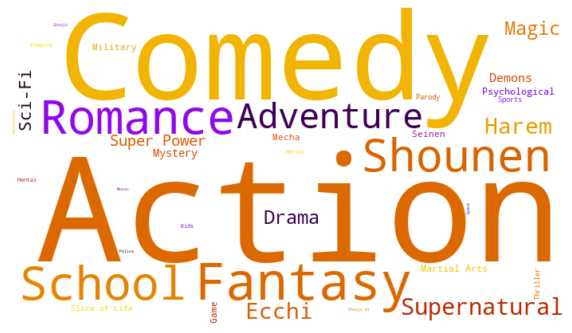

> animes highly rated by this user


,eng_version,Genres
3971,Fullmetal Alchemist:Brotherhood,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen"
5683,Steins;Gate,"Thriller, Sci-Fi"
6474,Hunter x Hunter,"Action, Adventure, Fantasy, Shounen, Super Power"
11624,Haikyu!! 3rd Season,"Comedy, Sports, Drama, School, Shounen"
8883,Your Lie in April,"Drama, Music, Romance, School, Shounen"


In [33]:
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
print('> animes highly rated by this user')

pd.DataFrame(user_pref).head(5)

# **Recommending** animes for a user

In [34]:
def get_recommended_animes(similar_users, n=10):
    recommended_animes = []
    anime_list = []
    
    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id), verbose=0)
        pref_list = pref_list[~ pref_list.eng_version.isin(user_pref.eng_version.values)]
        anime_list.append(pref_list.eng_version.values)
        
    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)
    
    for i, anime_name in enumerate(sorted_list.index):        
        n_user_pref = sorted_list[sorted_list.index == anime_name].values[0][0]
        if isinstance(anime_name, str):
            try:
                frame = getAnimeFrame(anime_name)
                anime_id = frame.anime_id.values[0]
                genre = frame.Genres.values[0]
                sypnopsis = getSypnopsis(int(anime_id))
                recommended_animes.append({#"anime_id": anime_id ,
                                            "n": n_user_pref,
                                            "anime_name": anime_name, 
                                            "Genres": genre, 
                                            "sypnopsis": sypnopsis})
            except:
                pass
    
    return pd.DataFrame(recommended_animes)

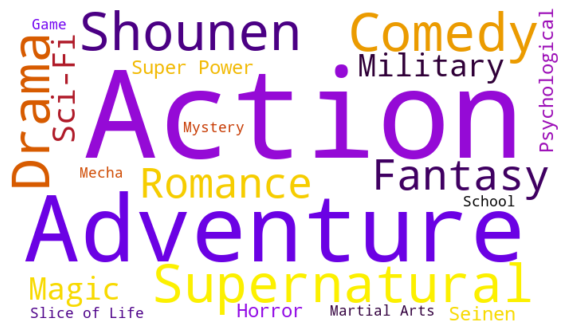

Top recommendations for user: 330601


,n,anime_name,Genres,sypnopsis
0,5,GATE,"Action, Military, Adventure, Fantasy","Several months have passed since the infamous Ginza Incident, with tensions between the Empire and JSDF escalating in the vast and mysterious ""Special Region"" over peace negotiations. The greed and curiosity of the global powers have also begun to grow, as reports about the technological limitations of the magical realm's archaic civilizations come to light. Meanwhile, Lieutenant Youji Itami and his merry band of female admirers struggle to navigate the complex political intrigue that plagues the Empire's court. Despite her best efforts, Princess Piña Co Lada faces difficulties attempting to convince her father that the JSDF has no intention of conquering their kingdom. Pressured from both sides of the Gate, Itami must consider even more drastic measures to fulfill his mission."
1,5,Aldnoah.Zero,"Action, Military, Sci-Fi, Mecha","The discovery of a hypergate on the Moon once allowed the human race to teleport to Mars. Those who chose to settle there unearthed a technology far more advanced than that of their home planet, which they named ""Aldnoah."" This discovery led to the founding of the Vers Empire of Mars and a declaration of war against the ""Terrans,"" those who stayed behind on Earth. However, a battle on the moon—later called ""Heaven's Fall""—caused the hypergate to explode, destroying the moon and leading the two planets to establish an uneasy ceasefire. Their peace was a fragile one, however. Fifteen years later, high school student Inaho Kaizuka witnesses the plotted assassination of the Vers Empire's Princess Asseylum Vers Allusia, who had come to Earth in hopes of repairing the relationship between the empire and its homeland. The ceasefire is shattered, and the Martians declare war on the Terrans once again. In the face of this insurmountable enemy, Inaho and his friends must now fight against the Vers Empire to settle the war once and for all."
2,4,Overlord,"Action, Adventure, Fantasy, Game, Magic, Supernatural","The final hour of the popular virtual reality game Yggdrasil has come. However, Momonga, a powerful wizard and master of the dark guild Ainz Ooal Gown, decides to spend his last few moments in the game as the servers begin to shut down. To his surprise, despite the clock having struck midnight, Momonga is still fully conscious as his character and, moreover, the non-player characters appear to have developed personalities of their own! Confronted with this abnormal situation, Momonga commands his loyal servants to help him investigate and take control of this new world, with the hopes of figuring out what has caused this development and if there may be others in the same predicament."
3,4,Fairy Tail,"Action, Adventure, Comedy, Magic, Fantasy, Shounen","In the mystical land of Fiore, magic exists as an essential part of everyday life. Countless magic guilds lie at the core of all magical activity, and serve as venues for like-minded mages to band together and take on job requests. Among them, Fairy Tail stands out from the rest as a place of strength, spirit, and family. Lucy Heartfilia is a young mage searching for celestial gate keys, and her dream is to become a full-fledged wizard by joining this famous guild. In her search, she runs into Natsu Dragneel and his partner Happy, who are on a quest to find Natsu's foster father, the dragon Igneel. Upon being tricked by a man, Lucy falls under an abduction attempt, only to be saved by Natsu. To her shock, he reveals that he is a member of Fairy Tail and invites her to join them. There, Lucy meets the guild's strange members, such as the ice wizard Gray Fullbuster and magic swordswoman Erza Scarlet. Together as a family, they battle the forces of evil, help those in need, and gain new friends, all the while enjoying the never-ending adventure that is Fairy Tail."
4,4,The Last:Naruto the Movie,"Action, Super Power, Romance, Martial Arts, Shounen","Two years have passed sinc

In [36]:
recommended_animes = get_recommended_animes(similar_users, n=10)
getFavGenre(recommended_animes, plot=True)

print('Top recommendations for user: {}'.format(random_user))
recommended_animes

## **Ranking based Recommendation**

## pick up another random user

In [102]:
ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0]

## Using model to predict the rating result of unwatched anime and sort it

In [103]:
print("Showing recommendations for user: {}".format(random_user))
print("===" * 25)

animes_watched_by_user = rating_df[rating_df.user_id==random_user]
anime_not_watched_df = df[
    ~df["anime_id"].isin(animes_watched_by_user.anime_id.values)
]

anime_not_watched = list(
    set(anime_not_watched_df['anime_id']).intersection(set(anime2anime_encoded.keys()))
)

anime_not_watched1 = [[anime2anime_encoded.get(x)] for x in anime_not_watched]

user_encoder = user2user_encoded.get(random_user)

# set all unwatch anime watched episode as 0 and watching status as 'plan to watch'
we_layer = we2we_encoded.get(0)
ws_layer = ws2ws_encoded.get(6)

user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched1), anime_not_watched1,[[we_layer]] * len(anime_not_watched1),[[we_layer]] * len(anime_not_watched1))
)

user_anime_array = [user_anime_array[:, 0], user_anime_array[:, 1],user_anime_array[:, 2],user_anime_array[:, 3]]
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = (-ratings).argsort()[:5]

recommended_anime_ids = [
    anime_encoded2anime.get(anime_not_watched1[x][0]) for x in top_ratings_indices
]

Results = []
top_rated_ids = []

for index, anime_id in enumerate(anime_not_watched1):
    rating = ratings[index]
    id_ = anime_encoded2anime.get(anime_id[0])
    
    if id_ in recommended_anime_ids:
        top_rated_ids.append(id_)
        try:
            condition = (df.anime_id == id_)
            name = df[condition]['eng_version'].values[0]
            genre = df[condition].Genres.values[0]
            score = df[condition].Score.values[0]
            sypnopsis = getSypnopsis(int(id_))
        except:
            continue
            
        Results.append({#"anime_id": id_, 
                        "name": name, 
                        "pred_rating": rating,
                        "genre": genre, 
                        'sypnopsis': sypnopsis})

print("---" * 25)
print("> Top 5 anime recommendations")
print("---" * 25)


Results = pd.DataFrame(Results).sort_values(by='pred_rating', ascending=False)
Results

Showing recommendations for user: 305294
---------------------------------------------------------------------------
> Top 5 anime recommendations
---------------------------------------------------------------------------


,name,pred_rating,genre,sypnopsis
2,Angel Densetsu,0.746519,"Action, Comedy, School","hen Seikichi Kuroda—self-proclaimed ""guardian"" and head thug of Hekikuu High School—hears rumors of a first-year transfer student named Seiichirou Kitano terrorizing his entire class, Seikichi tries to intimidate him through authority. However, things go awry when he witnesses something horrifying—Seiichirou has a face so dreadful and haunting that even Seikichi hurries away in fear. But despite his menacing appearance, Seiichirou has a heart of gold. Inhibited by his poor communication skills and fear-inducing looks, he has never managed to convey his true self to his terrified peers, resulting in his lifelong ostracization. Now the new guardian, Seiichirou discovers that sometimes friends can be found in the most unlikely places and through the most unusual circumstances."
4,The Case of Hana & Alice,0.718479,"Drama, Mystery, Slice of Life","fter transferring to Ishinomori Middle School, Tetsuko ""Alice"" Arisugawa overhears her classmates discussing a strange rumor. The previous occupant of her seat, a nondescript ""Judas,"" is missing and presumed murdered—poisoned by one of his four wives. Amidst dealing with her mother's undesired meddling in her affairs and warding off her classmates' bullying, the troubled Alice starts to investigate the mystery surrounding Judas' disappearance. The trail of clues leads her to the house of her next-door neighbor, the quirky and reclusive Hana Arai. After an awkward introduction, Hana agrees to help Alice and formulates a plan that may lead them to the answers they seek. The two girls embark on a journey to uncover what happened to Judas, and perhaps a friendship may start to blossom between the two along the way."
1,Yukikaze,0.716774,"Action, Drama, Military, Psychological, Sci-Fi, Space","This full 3DCG digital animation has story takes place in the far future after a pillar of huge fog appeared suddenly in the South Pole. This pillar, known as Jam, is actually a passage for an earth invasion. In order to oppose the threat, the United Nations established an earth defense mechanism. Fukai Zero is a hero registered to the main force of earth defense and the special 5th flight squadron. His reconnaissance plane, Yukikaze (windblown snow) is the best tactical reconnaissance plane. His job is to collect battle information return safely to the base with the information. But one day when he about to finish his duty, an unidentified machine attacked him... (Source: AnimeNfo)"
3,A Letter to Momo,0.715655,"Supernatural, Drama","fter the unexpected death of her father, 11-year-old Momo Miyaura leaves Tokyo with her mother and moves to an old remote island in Seto Inland Sea. The only memento she has from her father is an unfinished letter with only two words inside: ""Dear Momo""—along with her heart's unrest from it. In the new and unfamiliar small town, Momo reluctantly tries to adjust to the outmoded wooden buildings, silent crop fields, and mysterious isolated shrines. One day, while exploring the attic of her new home, she finds a worn out picture book about youkai. Following this discovery, strange things begin to happen around town, and Momo is greeted by the arrival of three troublesome youkai. Momo e no Tegami tells the story of a young girl as she struggles to adapt to her bizarre new life and ultimately come to terms with her father's mysterious letter."
0,Steamboy,0.701555,"Action, Military, Sci-Fi, Adventure, Historical, Drama","ay is a young wunderkind inventor living in Victorian England. His life is turned upside down when he receives a special package hailing from the United States, sent by his grandfather, Lloyd Steam. The package contains a device called a Steam Ball, a device so powerful that it can drive any machine that requires steam with a nearly limitless amount of energy. Ray is instructed to not let the Steam Ball fall into the wrong hands, which include the mighty O'Hara Foundation,